# Required Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools

# To save the model
import pickle

In [2]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec

# Load TRUE dataset:

In [4]:
true = pd.read_csv('True.csv')
true.shape

(21417, 4)

# Load FAKE dataset:

In [5]:
fake = pd.read_csv('Fake.csv')
fake.shape

C:\Users\akdps\AppData\Local\Temp\ipykernel_12500\3736710978.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('Fake.csv')


(23502, 172)

In [6]:
# Add labels
true['label'] = 1
fake['label'] = 0

In [7]:
# Concatenate dataframes
frames = [true.loc[:5000][:], fake.loc[:5000][:]]
df = pd.concat(frames)
df.shape

(10002, 173)

# Data Preprocessing:

In [8]:
X = df. drop('label', axis=1)
y = df['label']

df.shape

(10002, 173)

In [9]:
df.head(2)

,title,text,subject,date,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail(2)

,title,text,subject,date,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Remove the NaN values from the df dataset
df = df.dropna(axis=1, how='all')
df.shape

(10002, 5)

In [12]:
df.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [13]:
df2 = df.copy()
df2.reset_index(inplace=True)
df2.shape

(10002, 6)

In [14]:
#nltk.download('stopwords')

ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Saving the corpus:

In [88]:
with open('corpus.pkl', 'wb') as file:
    pickle.dump(corpus, file)

# Topic Modeling: 

In [89]:
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1,3))
data_vectorized = vectorizer.fit_transform(corpus)

lda_model = LatentDirichletAllocation(n_components=10)
lda_model.fit_transform(data_vectorized)

array([[0.01466604, 0.01466711, 0.01466609, ..., 0.01466621, 0.01466666,
        0.0146652 ],
       [0.01710428, 0.01710409, 0.01710387, ..., 0.01710327, 0.01710368,
        0.01710256],
       [0.01735354, 0.01735185, 0.01735235, ..., 0.01735335, 0.01735378,
        0.84382633],
       ...,
       [0.01706762, 0.01706561, 0.0170652 , ..., 0.84640352, 0.01706691,
        0.01706521],
       [0.01845877, 0.01845744, 0.01845726, ..., 0.83387855, 0.01845905,
        0.01845771],
       [0.01669405, 0.01669465, 0.01669468, ..., 0.01669324, 0.84975178,
        0.01669427]])

# Word Embeddings:

In [90]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=0)
word_embeddings = model.wv

In [91]:
def document_vector(doc, model):
    # Creating an empty array for the document vector
    # Assuming Word2Vec vectors have a size of 100
    doc_vec = np.zeros(100)  

    # Count the number of words in the document
    num_words = 0

    for word in doc:
        if word in model:
            doc_vec += model[word]
            num_words += 1

    if num_words > 0:
        doc_vec /= num_words

    return doc_vec

X = [document_vector(doc, word_embeddings) for doc in corpus]
X = np.array(X)
y = df2['label']

In [76]:
# Principal Component Analysis (PCA) to reduce the number of features in your data while retaining important information.
# Dimensionality Reduction Technique

#from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components (features)
#pca = PCA(n_components=100)

# Fit and transform your data to reduce dimensionality
#X_red = pca.fit_transform(X)

In [92]:
#print("X shape:", X_red.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10002, 100)
y shape: (10002,)


In [93]:
# Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model building - Passive Aggresive Classifier:

In [94]:
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [95]:
pred = classifier.predict(X_test)

# Performance Metrics:

In [96]:
accuracy = accuracy_score(y_test, pred) * 100
precision = precision_score(y_test, pred) * 100
recall = recall_score(y_test, pred) * 100
f1 = f1_score(y_test, pred) * 100
roc_auc = roc_auc_score(y_test, pred)

print("Accuracy: %0.3f" % accuracy)
print("Precision: %0.3f" % precision)
print("Recall: %0.3f" % recall)
print("F1 Score: %0.3f" % f1)
print("ROC AUC Score: %0.3f" % roc_auc)

Accuracy: 82.159
Precision: 85.698
Recall: 76.351
F1 Score: 80.755
ROC AUC Score: 82.048


# Confusion Matrix Plot:

Confusion Matrix without Normalization


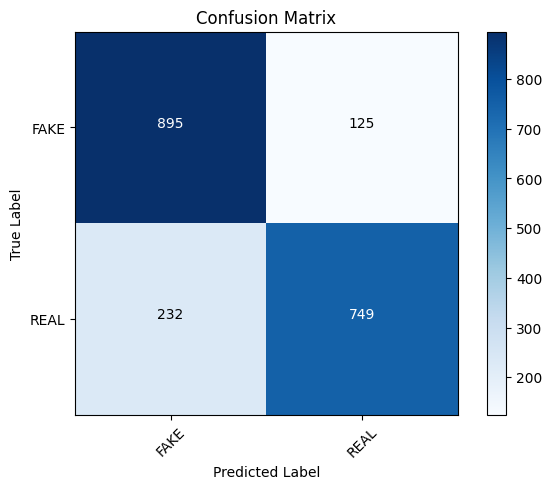

In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [83]:
# Save model and vectorizer using pickle 
# pickle.dump(classifier, open('model.pkl', 'wb'))
# pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [98]:
# Load model and vectorizer to predict the previous datapoint
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [99]:
# Preprocess the previous datapoint
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'union thing america want money invest berni sander must happi endors crookedhillari okay keep money train flow hillari campaign coffer goldman sach actual ban employe donat trump legal hillari clinton face heat accept give three speech goldman sach employe exactli hefti fee buy critic contend revolv door wall street washington wall street exec shuffl back forth financi sector key job work friend washington abl influenc financi law regul yet despit heavi critic wall street taken recent year clinton still chose take hundr thousand dollar pac employe director famili associ biggest bank streamjust two month leav state depart hillari clinton began short lucr speak career bank secur firm trade associ three time goldman sach octob hillari clinton paid speak goldman sach builder innov confer held ritz carlton dove mountain resort marana arizona structur convers clinton goldman sach ceo lloyd blankfein accord two attende audienc fill tech entrepreneur investor cnn'

In [100]:
# Transform the preprocessed datapoint using the loaded vectorizer
val = loaded_vectorizer.transform([review]).toarray()

In [101]:
# Predict the label of the preprocessed datapoint using the loaded model
prediction = loaded_model.predict(val)
print("Prediction: ", prediction)

# ERROR!
# ValueError: X has 5000 features, but PassiveAggressiveClassifier is expecting 100 features as input.

Prediction:  [0]
